<a href="https://colab.research.google.com/github/GuoyaoShen/DiatomDL/blob/main/main_v_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script works as a main script of v1.0 for testing

# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path_reflection = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/Diatom_vis_1_reflection.txt'
path_transmission = '/content/drive/My Drive/BU Class/Research/BioDL_Project/data/Diatom_vis_1_transmission.txt'

data_reflection = np.loadtxt(path_reflection, skiprows=2)
data_transmission = np.loadtxt(path_transmission, skiprows=2)

In [4]:
print(data_reflection.shape)
print(data_reflection)
print(data_reflection[:,0])
print('===============================================')
print(data_transmission.shape)
print(data_transmission)
print(data_transmission[:,0])

freq = data_reflection[:,0]
reflect = data_reflection[:,1]
transmit = data_transmission[:,1]
absorb = 1-reflect**2-transmit**2

(1001, 2)
[[3.7500000e+02 8.2363425e-01]
 [3.7537500e+02 8.2223127e-01]
 [3.7575000e+02 8.2080025e-01]
 ...
 [7.4925000e+02 1.7821816e-01]
 [7.4962500e+02 1.7750409e-01]
 [7.5000000e+02 1.7679832e-01]]
[375.    375.375 375.75  ... 749.25  749.625 750.   ]
(1001, 2)
[[3.7500000e+02 1.9462933e-02]
 [3.7537500e+02 1.9522859e-02]
 [3.7575000e+02 1.9582780e-02]
 ...
 [7.4925000e+02 2.2614385e-03]
 [7.4962500e+02 2.2554354e-03]
 [7.5000000e+02 2.2495034e-03]]
[375.    375.375 375.75  ... 749.25  749.625 750.   ]


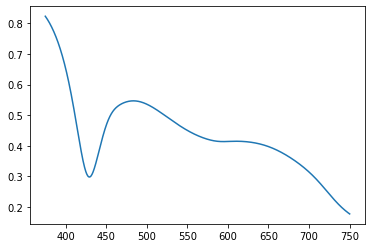

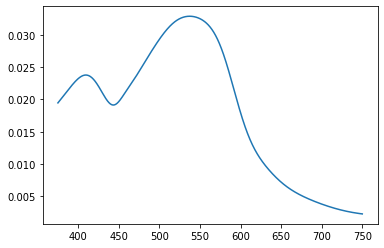

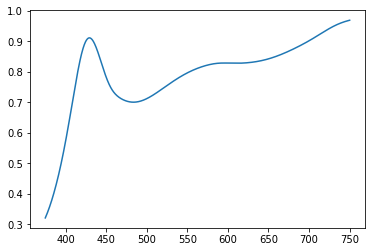

In [5]:
plt.figure(1)
plt.plot(data_reflection[:,0], data_reflection[:,1])
plt.figure(2)
plt.plot(data_transmission[:,0], data_transmission[:,1])
plt.figure(3)
plt.plot(freq, absorb)

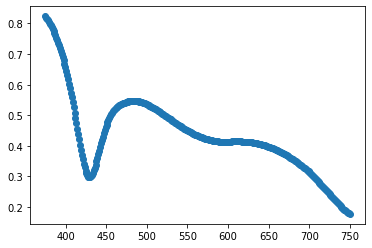

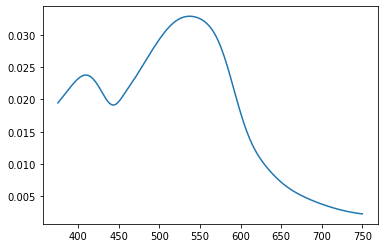

In [8]:
plt.figure(1)
plt.scatter(data_reflection[::10,0], data_reflection[::10,1])
plt.figure(2)
plt.plot(data_transmission[::2,0], data_transmission[::2,1])

# Model

## Model Construct

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class SquareLayer(nn.Module):
    def __init__(self, dim_in, dim_out):
        super(SquareLayer, self).__init__()
        self.linear = nn.Linear(dim_in, dim_out, bias=False)
        self.bilinear = nn.Bilinear(dim_in, dim_in, dim_out)

    def forward(self, x):
        out = self.linear(x) + self.bilinear(x,x)
        return  out


class NetDense(nn.Module):
    def __init__(self, dim_in, dim_out):
        super(NetDense, self).__init__()
        # nn.Bilinear

        self.fc_encoder = nn.Sequential(
        nn.Linear(dim_in, 100),
        nn.ReLU(True),
        nn.Linear(100, 500),
        nn.ReLU(True),
        nn.Linear(500, 1000),
        nn.ReLU(True),
        nn.Linear(1000, 1500),
        nn.ReLU(True),
        nn.Linear(1500, 500),
        nn.ReLU(True),
        nn.Linear(500, 2000),
        nn.ReLU(True),
        nn.Linear(2000, dim_out),
        nn.ReLU(True),
        # nn.Linear(1500, 500),
        # nn.ReLU(True),
        # nn.Linear(1500, 500),
        )

        self.conv_decoder = nn.Sequential(
        pass
        )

    

    def forward(self, x):
        pass

        return 

SyntaxError: ignored